In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,r2_score,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

In [3]:
df_test  = pd.read_csv(r"C:\Users\amuke\Desktop\datasets\MentalHealth\test.csv")
df_sub = pd.read_csv(r"C:\Users\amuke\Desktop\datasets\MentalHealth\sample_submission.csv")
df=pd.read_csv(r"C:\Users\amuke\Desktop\datasets\MentalHealth\train.csv")

In [4]:
df['Work Pressure'].value_counts()

Work Pressure
2.0    24373
4.0    22512
5.0    22436
3.0    21899
1.0    21562
Name: count, dtype: int64

In [5]:
df_test.shape

(93800, 19)

In [6]:
df_test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [7]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [8]:
df_test['Profession'].value_counts()

Profession
Teacher           16385
Content Writer     5187
Architect          2982
Consultant         2920
Pharmacist         2656
                  ...  
Manvi                 1
24th                  1
ME                    1
3M                    1
M.Pharm               1
Name: count, Length: 64, dtype: int64

In [9]:
Profession_counts = df['Profession'].value_counts()
Profession_to_replace = Profession_counts[Profession_counts <=10].index
df['Profession'] = df['Profession'].replace(Profession_to_replace, 'Other')

In [10]:
Profession_counts = df_test['Profession'].value_counts()
Profession_to_replace = Profession_counts[Profession_counts <=10].index
df_test['Profession'] = df_test['Profession'].replace(Profession_to_replace, 'Other')

In [11]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [12]:
Dietary_counts = df['Dietary Habits'].value_counts()
Dietary_to_replace = Dietary_counts[Dietary_counts <=10].index
df['Dietary Habits'] = df['Dietary Habits'].replace(Dietary_to_replace, 'NotSure')

In [13]:
Dietary_counts = df_test['Dietary Habits'].value_counts()
Dietary_to_replace = Dietary_counts[Dietary_counts <=10].index
df_test['Dietary Habits'] = df_test['Dietary Habits'].replace(Dietary_to_replace, 'NotSure')

Text(0.5, 1.0, 'Depression according Dietary Habits')

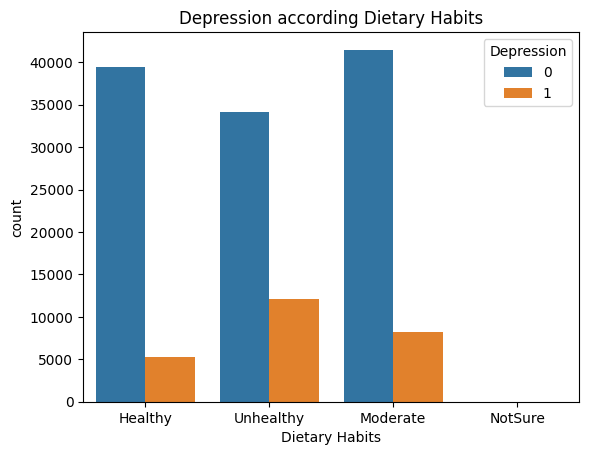

In [14]:
sns.countplot(x='Dietary Habits',data=df,hue='Depression')
plt.title('Depression according Dietary Habits')

## Unhealthy dietary Habits lead to Depression

Text(0.5, 1.0, 'Depression according to Profession ')

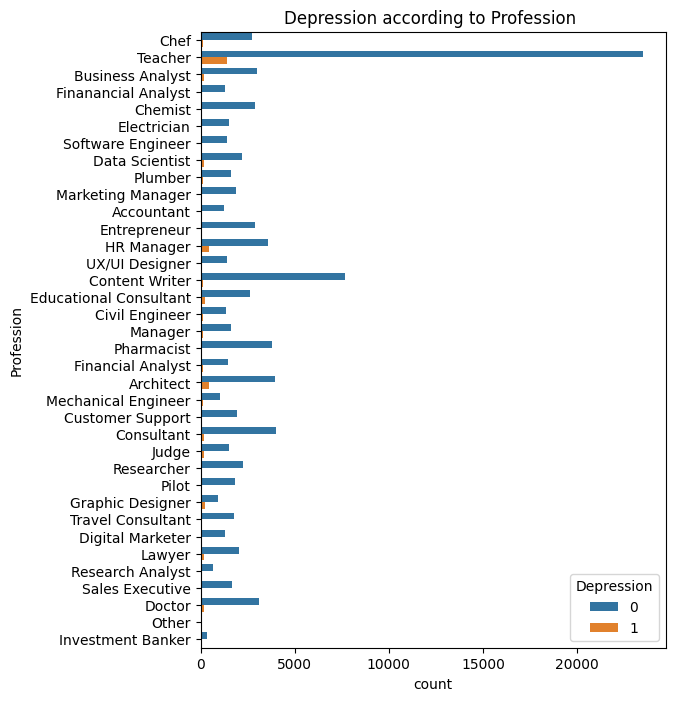

In [15]:
plt.figure(figsize=(6,8))
sns.countplot(y='Profession',data=df,hue='Depression')
plt.title('Depression according to Profession ')

In [16]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Text(0.5, 1.0, 'Depression according to Gender ')

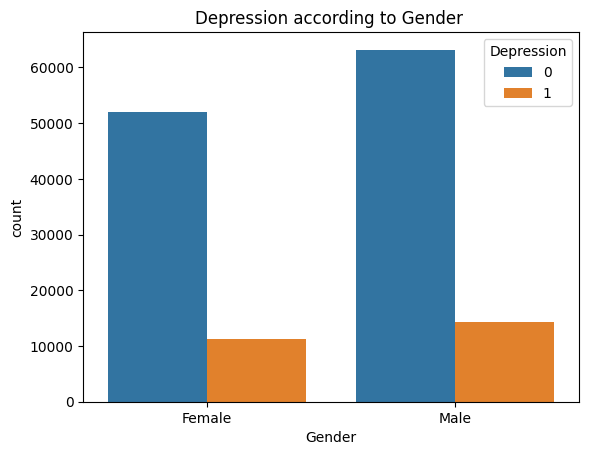

In [17]:

sns.countplot(x='Gender',data=df,hue='Depression')
plt.title('Depression according to Gender ')

Text(0.5, 1.0, 'Depression according to Work Pressure ')

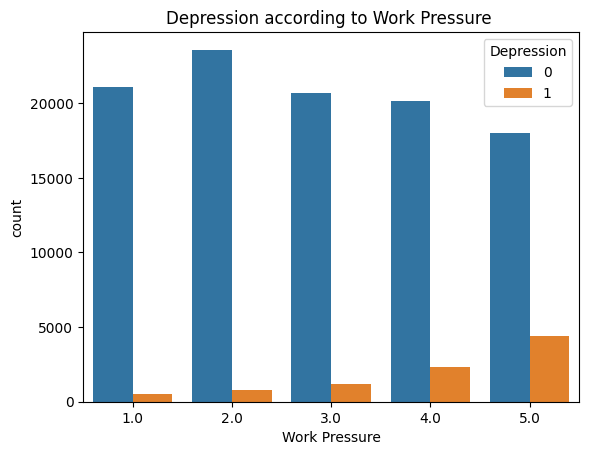

In [18]:
sns.countplot(x='Work Pressure',data=df,hue='Depression')
plt.title('Depression according to Work Pressure ')

## Work pressure is the most common factor for depression 

In [19]:
df['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [20]:
Degree_counts = df['Degree'].value_counts()
Degree_to_replace = Degree_counts[Degree_counts <=10].index
df['Degree'] = df['Degree'].replace(Degree_to_replace, 'Other')

In [21]:
Degree_counts = df_test['Degree'].value_counts()
Degree_to_replace = Degree_counts[Degree_counts <=10].index
df_test['Degree'] = df_test['Degree'].replace(Degree_to_replace, 'Other')

Text(0.5, 1.0, 'Depression according to Degree')

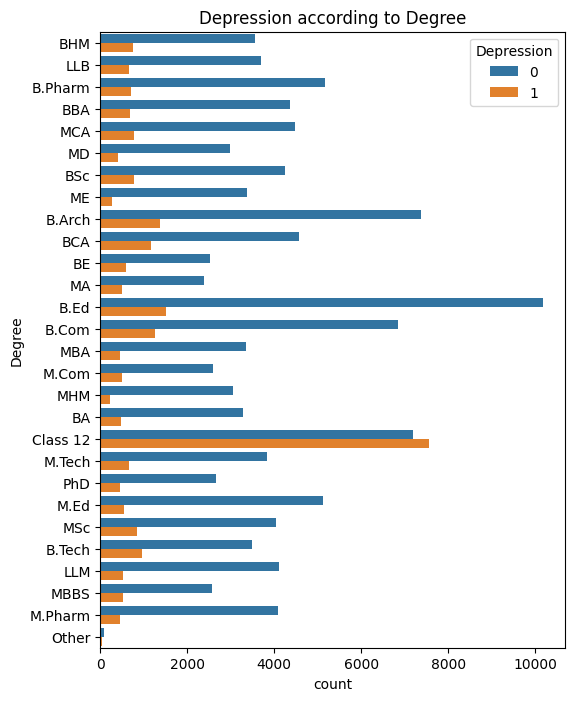

In [22]:
plt.figure(figsize=(6,8))
sns.countplot(y='Degree',data=df,hue='Depression')
plt.title('Depression according to Degree')

## 12th student are the most 

In [23]:
bins = [10, 18, 35, 50, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [24]:
df['age_group'].value_counts()

age_group
Adult          53395
Young Adult    47195
Middle-aged    40110
Child              0
Senior             0
Name: count, dtype: int64

In [25]:
bins = [0, 18, 35, 50, 65, 100]  # Age groups: 0-18, 19-35, 36-50, 51-65, 66-100
labels = ['10-18', '19-35', '36-50', '51-65', '66+']  # Corresponding labels

# Create a new column 'age_range' using pd.cut() to assign age groups
df['age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [26]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,age_group,age_range
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,Adult,36-50
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,Young Adult,19-35
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,Young Adult,19-35
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,...,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,Young Adult,19-35
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,...,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,Young Adult,19-35


In [27]:
Sleep_Duration_counts = df['Sleep Duration'].value_counts()
Sleep_Duration_to_replace = Sleep_Duration_counts[Sleep_Duration_counts <=12].index
df['Sleep Duration'] = df['Sleep Duration'].replace(Sleep_Duration_to_replace, 'Irregular')

In [28]:
Sleep_Duration_counts = df_test['Sleep Duration'].value_counts()
Sleep_Duration_to_replace = Sleep_Duration_counts[Sleep_Duration_counts <=12].index
df_test['Sleep Duration'] = df_test['Sleep Duration'].replace(Sleep_Duration_to_replace, 'Irregular')

In [29]:
df_test.shape

(93800, 19)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'More than 8 hours'),
  Text(1, 0, 'Less than 5 hours'),
  Text(2, 0, '5-6 hours'),
  Text(3, 0, '7-8 hours'),
  Text(4, 0, 'Irregular')])

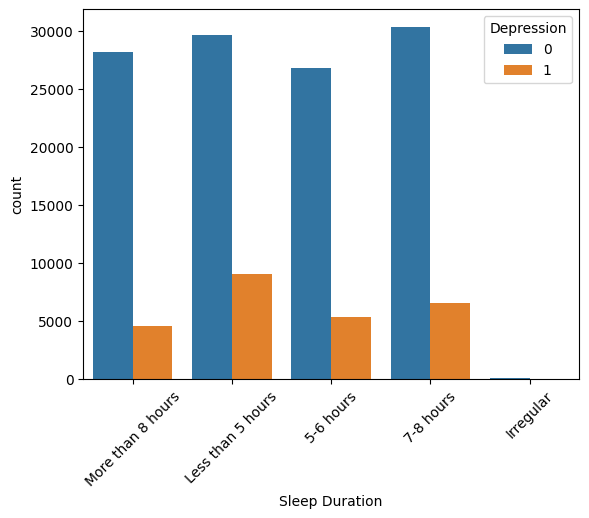

In [30]:
sns.countplot(x='Sleep Duration',data=df,hue='Depression')
plt.xticks(rotation=45)

In [31]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
Irregular               79
Name: count, dtype: int64

In [32]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

## Handle Missing Values with Appropriate value

In [33]:
missing_indices = df[df['Job Satisfaction'].isnull()].index
categories = df['Job Satisfaction'].dropna().unique()

# Randomly impute the missing values
df.loc[missing_indices, 'Job Satisfaction'] = np.random.choice(categories, size=len(missing_indices))

In [34]:
missing_indices = df_test[df_test['Job Satisfaction'].isnull()].index
categories = df_test['Job Satisfaction'].dropna().unique()

# Randomly impute the missing values
df_test.loc[missing_indices, 'Job Satisfaction'] = np.random.choice(categories, size=len(missing_indices))

In [35]:
missing_indices = df[df['Profession'].isnull()].index
categories = [
    'Teacher', 'Content Writer', 'Architect', 'Consultant', 'HR Manager', 
    'Pharmacist', 'Doctor', 'Business Analyst','Teacher', 'Entrepreneur', 'Chemist', 
    'Chef', 'Educational Consultant', 'Data Scientist', 'Researcher', 'Lawyer', 
    'Customer Support', 'Marketing Manager', 'Pilot', 'Travel Consultant', 
    'Plumber', 'Sales Executive', 'Manager','Teacher', 'Judge', 'Electrician'
]

df.loc[missing_indices, 'Profession'] = np.random.choice(categories, size=len(missing_indices))


In [36]:
missing_indices = df_test[df_test['Profession'].isnull()].index
categories = [
    'Teacher', 'Content Writer', 'Architect', 'Consultant', 'HR Manager', 
    'Pharmacist', 'Doctor', 'Business Analyst','Teacher', 'Entrepreneur', 'Chemist', 
    'Chef', 'Educational Consultant', 'Data Scientist', 'Researcher', 'Lawyer', 
    'Customer Support', 'Marketing Manager', 'Pilot', 'Travel Consultant', 
    'Plumber', 'Sales Executive', 'Manager','Teacher', 'Judge', 'Electrician'
]

df_test.loc[missing_indices, 'Profession'] = np.random.choice(categories, size=len(missing_indices))


In [37]:

missing_indices = df[df['Work Pressure'].isnull()].index
categories = df['Work Pressure'].dropna().unique()

# Randomly impute the missing values
df.loc[missing_indices, 'Work Pressure'] = np.random.choice(categories, size=len(missing_indices))


In [38]:

missing_indices = df_test[df_test['Work Pressure'].isnull()].index
categories = df_test['Work Pressure'].dropna().unique()

df_test.loc[missing_indices, 'Work Pressure'] = np.random.choice(categories, size=len(missing_indices))

In [39]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112803
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
age_group                               

<Axes: xlabel='Working Professional or Student', ylabel='count'>

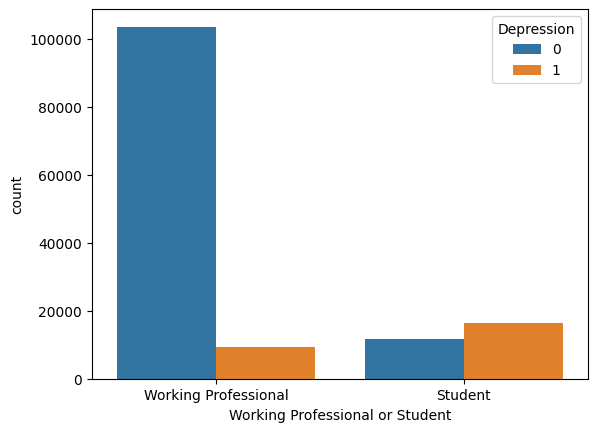

In [40]:
sns.countplot(x='Working Professional or Student',data=df,hue='Depression')

<Axes: xlabel='Financial Stress', ylabel='count'>

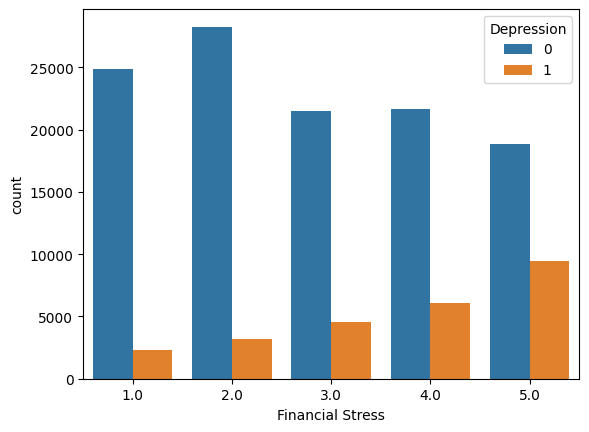

In [41]:
sns.countplot(x='Financial Stress',data=df,hue='Depression')

<Axes: xlabel='Work/Study Hours', ylabel='count'>

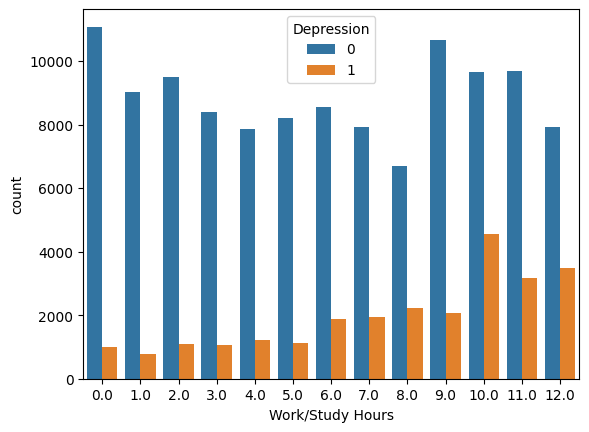

In [42]:
sns.countplot(x='Work/Study Hours',data=df,hue='Depression')

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

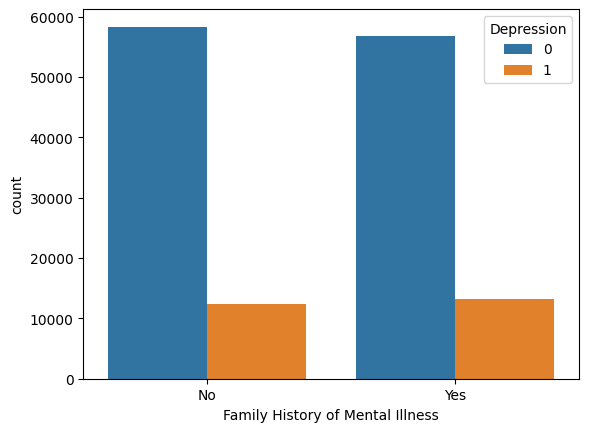

In [43]:
sns.countplot(x='Family History of Mental Illness',data=df,hue='Depression')

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

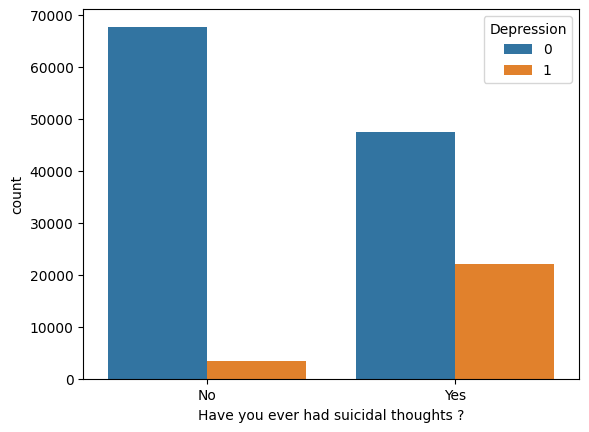

In [44]:
sns.countplot(x='Have you ever had suicidal thoughts ?',data=df,hue='Depression')

In [45]:
City_counts = df['City'].value_counts()
City_to_replace = City_counts[City_counts <=10].index
df['City'] = df['City'].replace(City_to_replace, 'Others')

In [46]:
City_counts = df_test['City'].value_counts()
City_to_replace = City_counts[City_counts <=10].index
df_test['City'] = df_test['City'].replace(City_to_replace, 'Others')

Text(0.5, 1.0, 'Depression according to age_range')

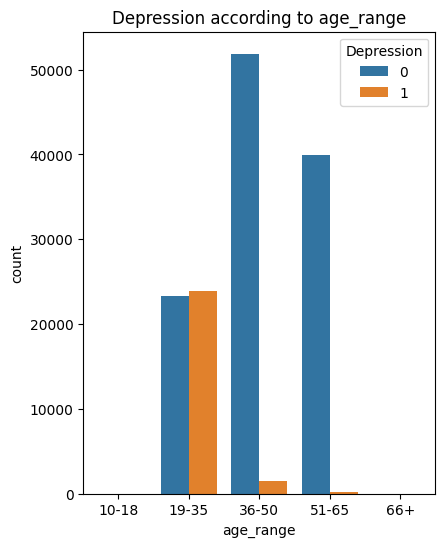

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(x='age_range',data=df,hue='Depression')
plt.title('Depression according to age_range')


In [48]:
df['Dietary Habits']=df['Dietary Habits'].fillna('Healthy')
df['Degree']=df['Degree'].fillna('BBA')
df_test['Degree']=df_test['Degree'].fillna('BBA')
df_test['Dietary Habits']=df_test['Dietary Habits'].fillna('Healthy')

In [49]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'age_group', 'age_range'],
      dtype='object')

In [50]:
columns = ['Age','Work Pressure', 'CGPA',
             'Work/Study Hours','Financial Stress', 'Depression',]

df_subset = df[columns]
corr_matrix=df_subset.corr()

<Axes: >

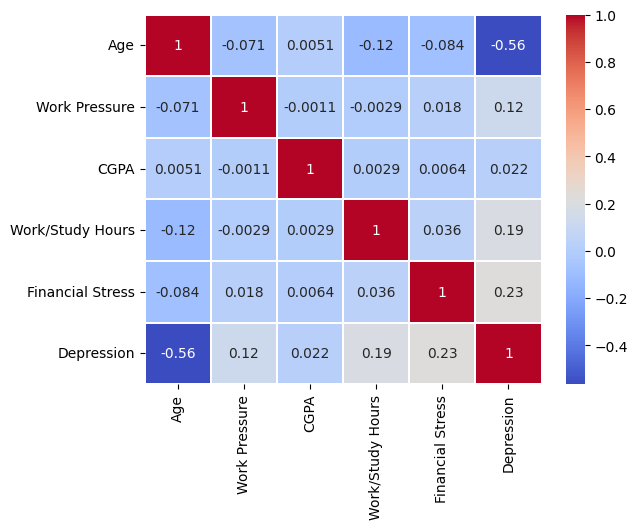

In [51]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True,linewidths=0.2)

In [52]:
df_sample = df.sample(10000, random_state=42)

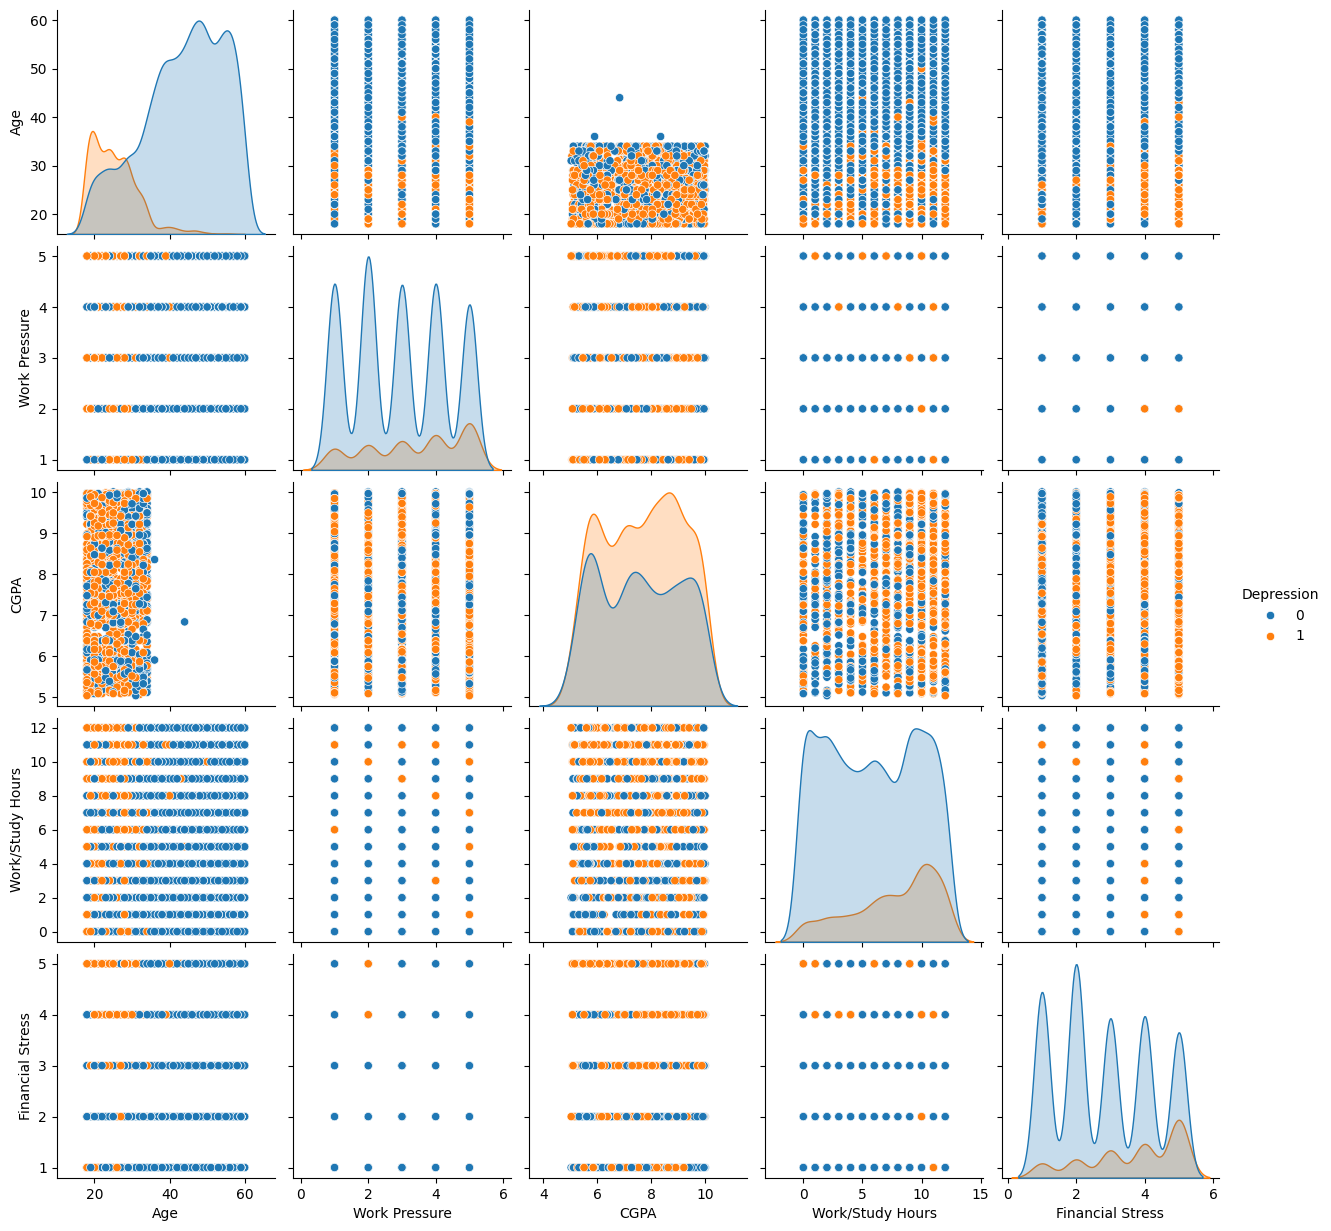

In [53]:
sns.pairplot(df_sample[columns],hue='Depression')

In [54]:
X = df.drop(columns=['Academic Pressure','Study Satisfaction','CGPA','Depression','id','Name','age_group', 'age_range' ])
Y = df['Depression']
X_test = df_test.drop(columns=['Academic Pressure','Study Satisfaction','CGPA','id','Name'])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:
x_train.head(2)

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
33707,Male,55.0,Bangalore,Working Professional,Teacher,1.0,5.0,More than 8 hours,Unhealthy,B.Ed,No,4.0,2.0,Yes
133592,Male,54.0,Thane,Working Professional,Teacher,5.0,4.0,Less than 5 hours,Healthy,M.Com,No,11.0,4.0,Yes


In [57]:
trf1=ColumnTransformer([('Impute',SimpleImputer(strategy='mean'),[12]),

                        ('ohe', OneHotEncoder(drop='first', sparse_output=False), [0,2,3,4,7,8,9,10,13])
                        
                              ], remainder='passthrough')

In [58]:
Scaler=StandardScaler()

In [59]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
lg= LGBMClassifier()
rfc= RandomForestClassifier()

In [60]:
pipe=make_pipeline(trf1,Scaler,lr)


In [61]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute', SimpleImputer(),
                                                  [12]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 2, 3, 4, 7, 8, 9, 10,
                                                   13])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [62]:
pipe=make_pipeline(trf1,Scaler,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.9259772565742715

In [63]:
f1_score(y_test,y_pred)

0.7927569396079992

In [64]:
cross_val_score(pipe,x_train,y_train,cv=10,scoring='accuracy').mean()

0.9271766169154227

In [65]:
pipe=make_pipeline(trf1,Scaler,dt)
pipe.fit(x_train,y_train)
y_pred_d=pipe.predict(x_test)
accuracy_score(y_test,y_pred_d)

0.8957000710732054

In [66]:
pipe=make_pipeline(trf1,Scaler,rfc)
pipe.fit(x_train,y_train)
y_pred2=pipe.predict(x_test)
accuracy_score(y_test,y_pred2)

0.9279673063255153

In [67]:
pipe=make_pipeline(trf1,Scaler,lg)
pipe.fit(x_train,y_train)
y_pred1=pipe.predict(x_test)
accuracy_score(y_test,y_pred1)

[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


0.9305259417199716

In [68]:
X_test.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [69]:
pipe=make_pipeline(trf1,Scaler,lg)
pipe.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute', SimpleImputer(),
                                                  [12]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 2, 3, 4, 7, 8, 9, 10,
                                                   13])])),
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

In [70]:
y_pred_test=pipe.predict(X_test)

In [71]:
df_sub

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0
...,...,...
93795,234495,0
93796,234496,0
93797,234497,0
93798,234498,0


In [72]:
submission=pd.DataFrame({
    'id':df_test['id'],
    'Depression':y_pred_test
})

In [73]:
submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [74]:
submission.to_csv("submission.csv",index=False)